In [28]:
library(skitools)
install_github("mskilab/gGnome", quiet = T)
relib("gGnome")

library(gTrack)


Attaching package: ‘gGnome’

The following object is masked from ‘package:skitools’:

    ra_breaks



In [6]:
GENOME = readRDS(system.file("extdata", "hg19.broad.BSgenome.rds", package="gGnome"))
regularChr = c(as.character(1:22), "X", "Y") ## 24 regular chrs

# gGnome
Reference-based graph representation of structurally altered genome employing GenomicRanges framework.

## Install
```
library(devtools)
install_github("mskilab/gGnome")
```

## Dependencies
* GenomicRanges
```
source("http://bioconductor.org/biocLite.R")
biocLite("GenomicRanges")
```

* BSgenome
```
biocLite("BSgenome")
```
* igraph
```
install.packages("igraph")
```

* skitools
```
install_github("mskilab/skitools")
```

* gTrack
```
install_github("mskilab/gTrack")
```

## Quick start
```
library(gGnome)
```

* Creating a default gGraph object based on the reference genome. As shown below, the reference genome used is stored in an environment variable named GENOME, which is a BSgenome object of human Hg19. Here the genome is segmented into 24 disconnected chromosomes with 0 rearrangement junction.

In [7]:
g0 = gGraph$new()
g0

There is 1 circular contig(s): M 


A gGraph object.
Based on reference genome: GENOME

Total non-loose segmentation:24

Junction counts:
numeric(0)

* Worth noting is that for 24 chromosomes we represent them with a length 48 GRanges object, separating the two strands. When the graph is laid out, it shows no edges has been added.

GRanges object with 48 ranges and 2 metadata columns:
     seqnames         ranges strand |        cn     loose
        <Rle>      <IRanges>  <Rle> | <numeric> <logical>
   1        1 [1, 249250621]      + |         2         0
   2        2 [1, 243199373]      + |         2         0
   3        3 [1, 198022430]      + |         2         0
   4        4 [1, 191154276]      + |         2         0
   5        5 [1, 180915260]      + |         2         0
  ..      ...            ...    ... .       ...       ...
  20       20 [1,  63025520]      - |         2         0
  21       21 [1,  48129895]      - |         2         0
  22       22 [1,  51304566]      - |         2         0
  23        X [1, 155270560]      - |         2         0
  24        Y [1,  59373566]      - |         2         0
  -------
  seqinfo: 93 sequences from an unspecified genome

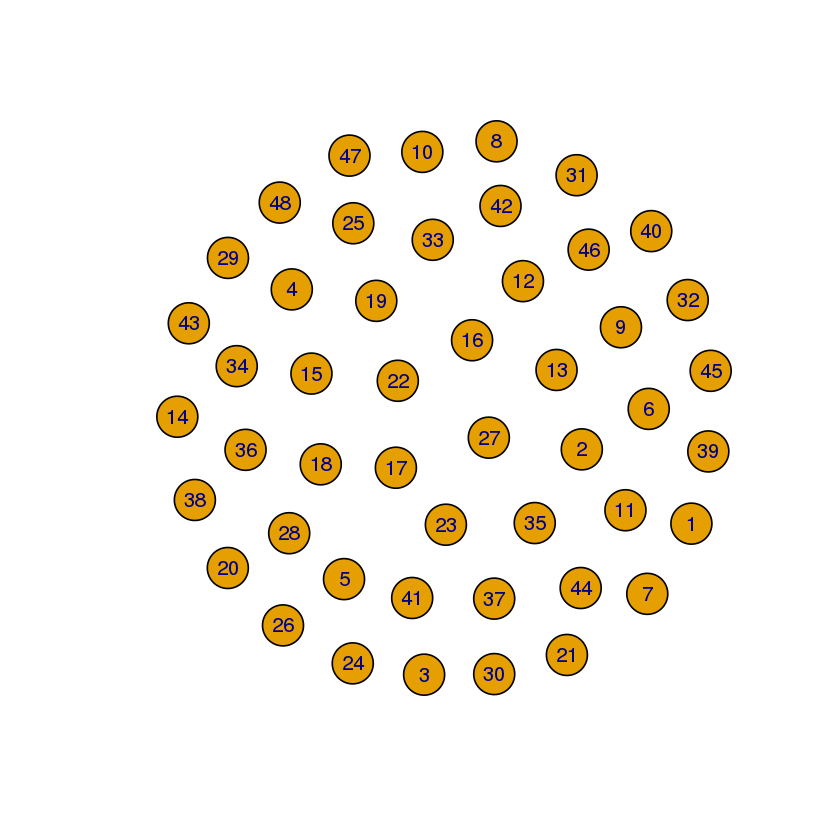

In [8]:
g0$segstats
plot(g0$G)

* Genome browser style visualization acheived by gTrack package. Y axis shows the copy number of each segment.

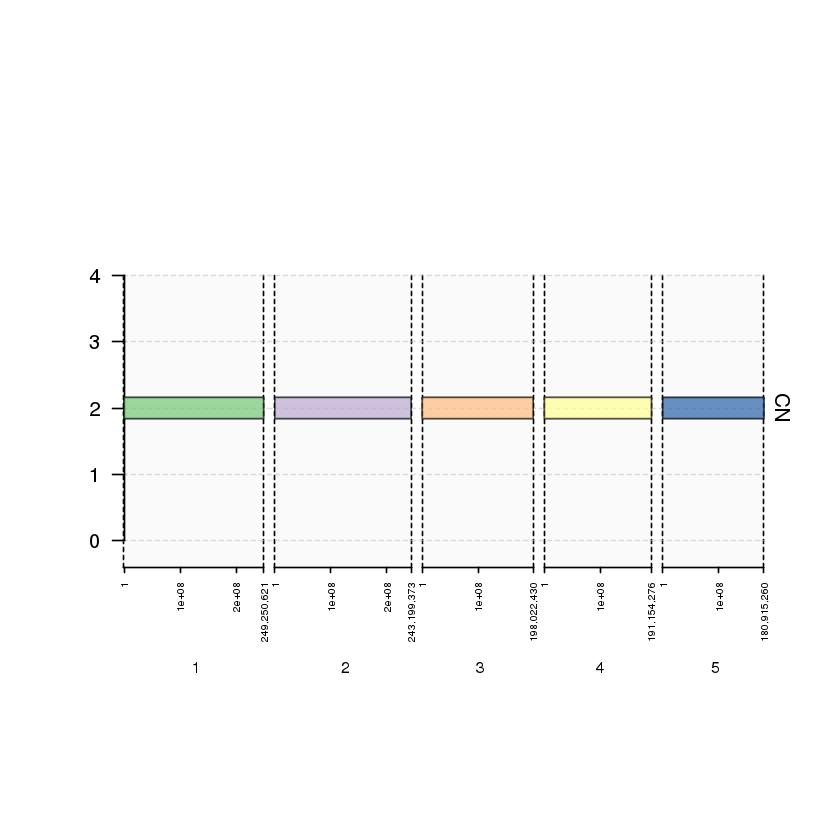

In [9]:
plot(g0$td, as.character(1:5), y.name="CN",gap=2e7,
     xaxis.chronly=T, xaxis.cex.tick=0.5, 
     y0=0, y1=4, ylab="CN",
     labels.suppress.grl=T, 
     gr.colorfield="seqnames")

* The positive strand and negative strand are named sequentially corresponding to their index in the GRanges, which is also their node id in the igraph object. We'll see the benefit of this implementation in the next session.

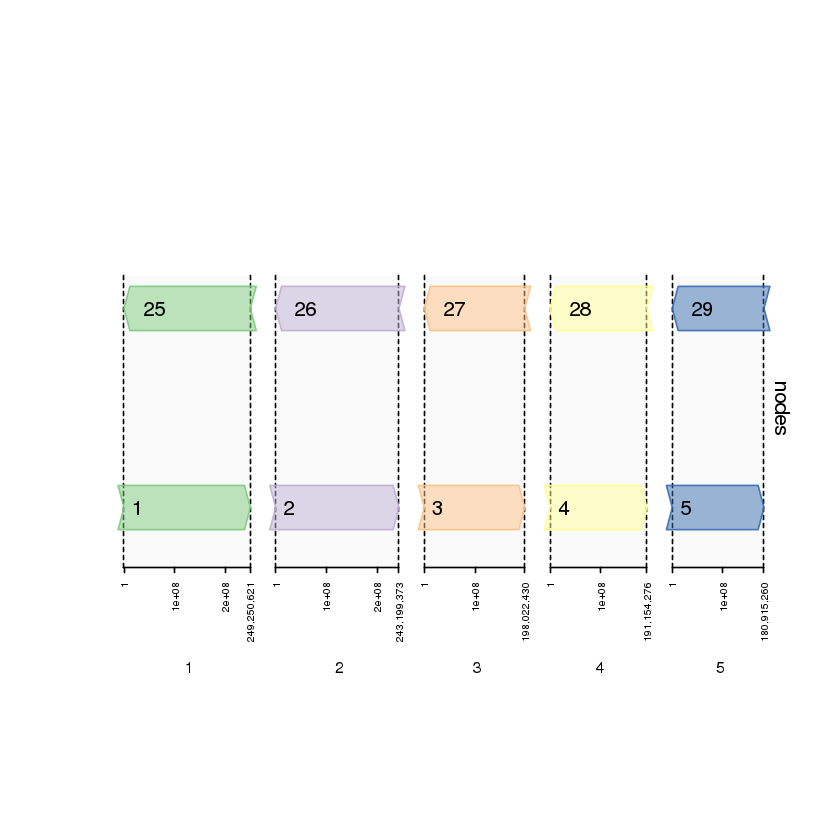

In [12]:
##png("/gpfs/commons/groups/imielinski_lab/home/yaox-934/public_html/plot.png", width = 1800, height = 900)
plot(gTrack(setNames(g0$segstats, seq_along(g0$segstats)), name="nodes"),
     as.character(1:5), gr.colorfield="seqnames",
     xaxis.chronly=T, xaxis.cex.tick=0.5, gap=5e7
    # , labels.suppress.grl=T
     , hadj.label=-1
     #, cex.label=0.75
    )
##dev.off()

* Read in an actual JaBbA output inferred from HCC1143 cell line whole genome sequencing as a gGraph. We see now in the graph there are 350 aberrant junctions (somatic adjacency that are not present in reference or germline), 310 loose ends (JaBbA's way of coping with false negative junction calls), and 1000 reference connections which help connect the adjacencies consistent with the reference genome.

In [29]:
jab = readRDS(system.file("extdata", "jabba.simple.rds", package = "gGnome"))
win = readRDS(system.file("extdata", "win_17.21.rds", package = "gGnome"))

g1 = gGraph$new(jabba=jab)
g1

only use 'jabba' or 'weaver' field, not both


A gGraph object.
Based on reference genome: GENOME

Total non-loose segmentation:1025

Junction counts:
type
 aberrant     loose reference 
      350       310      1000 

In [ ]:
* Gray bar: DNA segment; red links: aberrant junction; blue dashed: loose ends; gray link: reference adjacency.

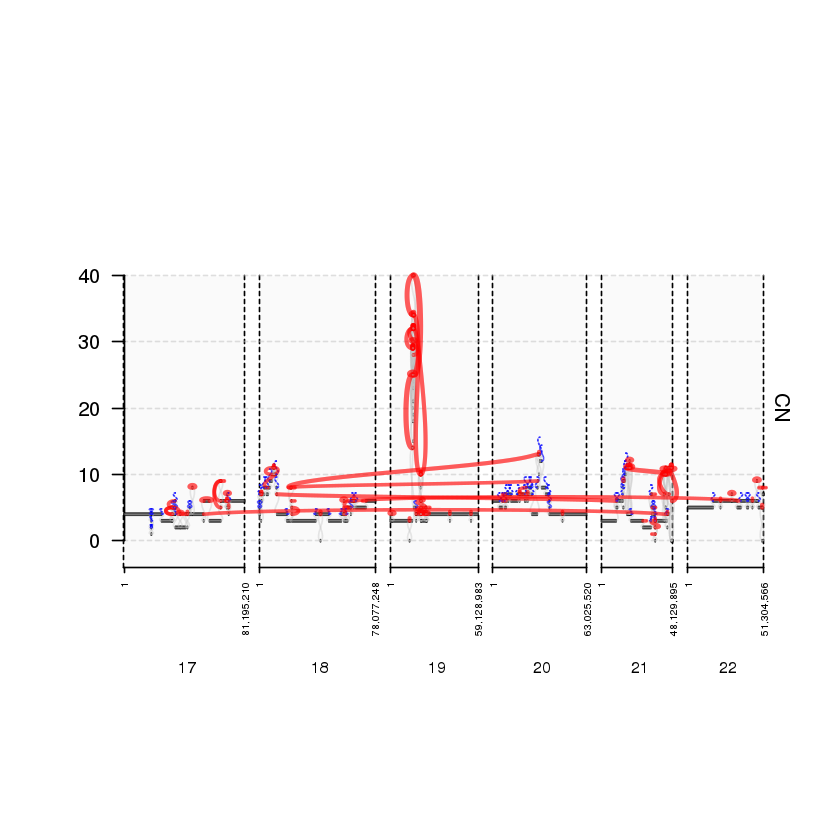

In [14]:
plot(g1$td, c(as.character(17:22)), xaxis.chronly=T, labels.suppress=T, gap=1e7, xaxis.cex.tick=0.5)

* zoom into a TRA between chr17 and chr21

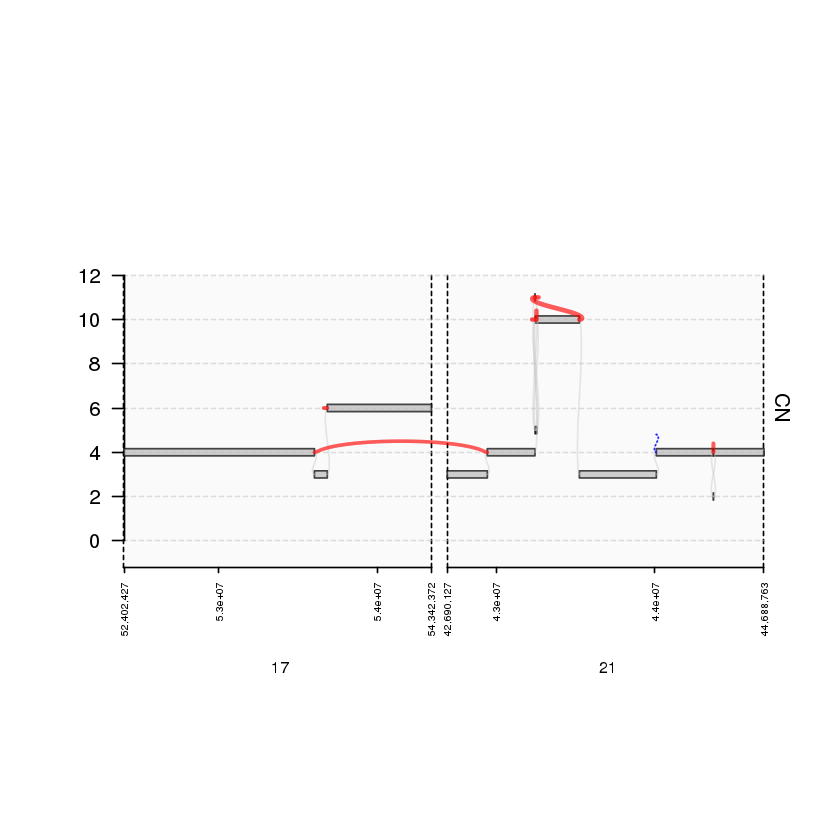

In [15]:
suppressWarnings(plot(g1$td, win, xaxis.chronly=T, labels.suppress=T, gap=1e5, xaxis.cex.tick=0.5))

* We can also extract the subgraph containing the 1Mbp neighborhood around these 2 windows.

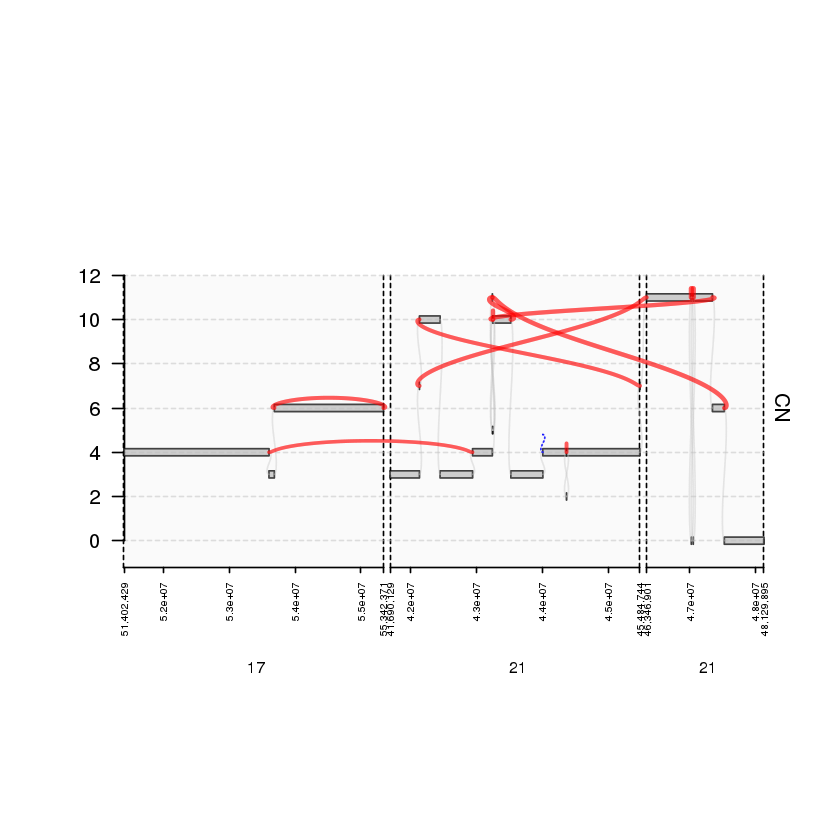

In [32]:
g2 = suppressWarnings(g1$hood(win, d=1e6))
suppressWarnings(plot(g2$td, streduce(g2$segstats), xaxis.chronly=T, labels.suppress=T, gap=1e5, xaxis.cex.tick=0.5))